In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
listings = pd.read_csv('/content/drive/MyDrive/Copy of Combined Listing Data [Summary].csv')

In [ ]:
listings.head(2)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv


In [ ]:
listings.isnull()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1633606,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1633607,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1633608,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
#Creating a pivot table to count number of hosts by year
pivot_table = pd.pivot_table(data=listings, index='Scrape File', values='host_id', aggfunc='count').reset_index()
pivot_table['Year']=pivot_table['Scrape File'].str[12:16]
pivot_table = pivot_table.groupby('Year')['host_id'].sum()
pivot_table.reset_index()
df = pd.DataFrame(pivot_table.reset_index())
indices_to_drop = [0, 6]
df = df.drop([0, 6])
df

,Year,host_id
1,2016,93008
2,2017,84787
3,2018,414794
4,2019,521823
5,2020,420714


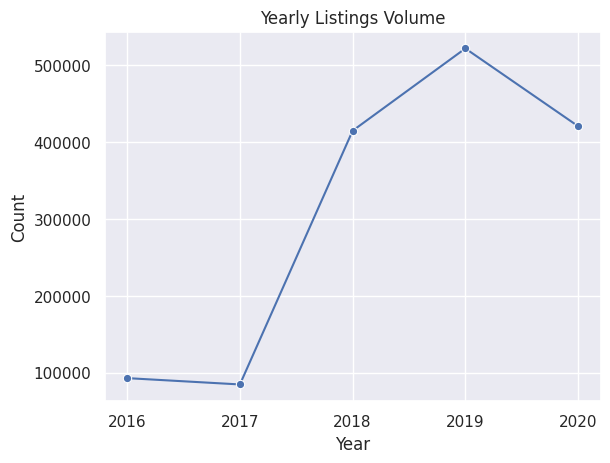

In [ ]:
#Plotting a line chart for volume of listings per year
sns.set_theme()
sns.lineplot(data=df, x='Year', y='host_id', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Listings Volume')
plt.show()

In [ ]:
#Pivot table for average rental pricing by year
#Filtering by scraping file year allows us to include a listing from 'X' host_id in the same subset as the year
#for eg. listing of host_id 583 in 2015 at 225$ in the 2015 price subset and then the same host's listing in 2016 at 225$
#in the 2016 subset and so on
pivot_table_2= pd.pivot_table(data = listings,
               index = ['host_id', 'Scrape File', 'neighbourhood'],
               values = 'price',
               aggfunc=np.mean)
pivot_table_2 = pivot_table_2.reset_index()
pivot_table_2['Year']=pivot_table_2['Scrape File'].str[12:16]
pivot_table_2 = pivot_table_2.groupby('Year')['price'].mean()
pivot_table_2.reset_index()
price_analysis = pd.DataFrame(pivot_table_2.reset_index())
price_analysis= price_analysis.drop([0, 6])
price_analysis

,Year,price
1,2016,179.879114
2,2017,186.750243
3,2018,200.776104
4,2019,209.578721
5,2020,226.453171


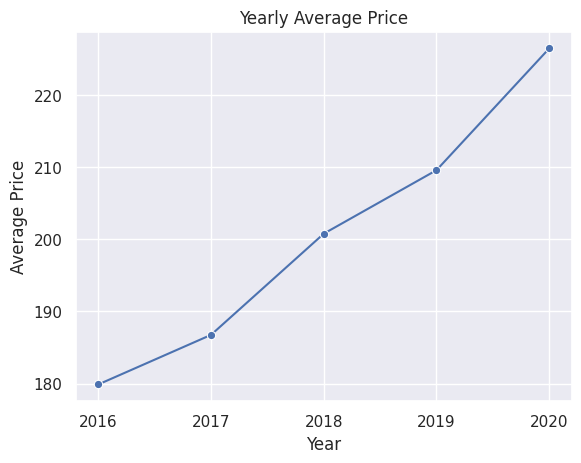

In [ ]:
#Plotting average yearly price graph
sns.set_theme()
sns.lineplot(data=price_analysis, x='Year', y='price', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Average Price')
plt.show()

In [ ]:
volume_df = pd.DataFrame(df)
volume_df.sort_values(by='Year', inplace=True)

# Calculate YOY percentage change
volume_df['Pc change'] = volume_df['host_id'].pct_change() * 100
volume_df.round(1)

,Year,host_id,Pc change
1,2016,93008,NaN
2,2017,84787,-8.8
3,2018,414794,389.2
4,2019,521823,25.8
5,2020,420714,-19.4


In [ ]:
price_df = pd.DataFrame(price_analysis)
price_df.sort_values(by='Year', inplace=True)

# Calculate YOY percentage change
price_df['Pc change'] = price_df['price'].pct_change() * 100
price_df.round(1)

,Year,price,Pc change
1,2016,179.9,NaN
2,2017,186.8,3.8
3,2018,200.8,7.5
4,2019,209.6,4.4
5,2020,226.5,8.1


In [ ]:
comparison_data = {'Year': [2016, 2017, 2018, 2019, 2020],
        'Listings_volume_%change': [np.NaN, -9, 100, 26, -19],
                   'Price_%change':[np.NaN, 2, 4, 5, 8]}

combined_df = pd.DataFrame(comparison_data)
combined_df

,Year,Listings_volume_%change,Price_%change
0,2016,NaN,NaN
1,2017,-9.0,2.0
2,2018,100.0,4.0
3,2019,26.0,5.0
4,2020,-19.0,8.0


In [ ]:
combined_df = combined_df[combined_df['Year'] != 2016]
print(type(combined_df))

<class 'pandas.core.frame.DataFrame'>


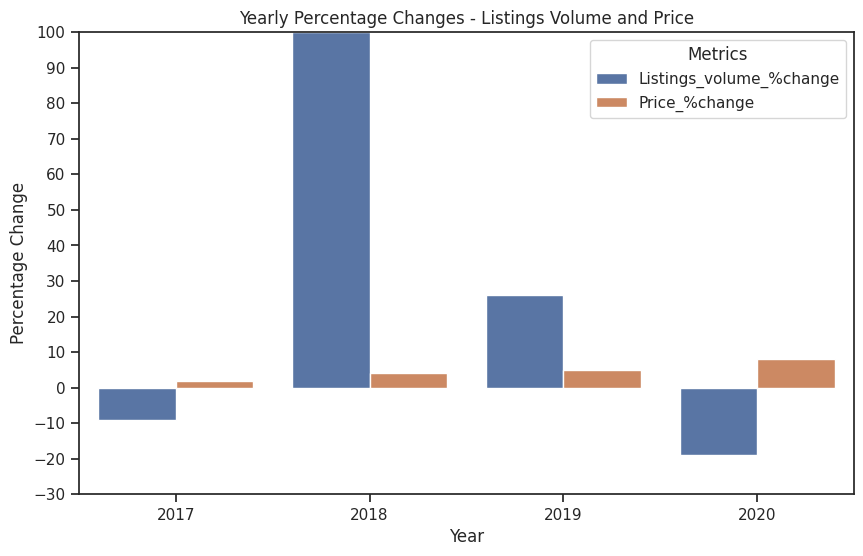

In [ ]:
# Set the style
sns.set(style="white")
sns.set_style("ticks")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))

# Melt the DataFrame for better visualization
df_melted = pd.melt(combined_df, id_vars=['Year'], var_name='Metric', value_name='Percentage Change')

# Use barplot
sns.barplot(x='Year', y='Percentage Change', hue='Metric', data=df_melted)

y_axis_difference = 10
plt.ylim(bottom=-30, top=100)
plt.yticks(np.arange(plt.ylim()[0], plt.ylim()[1] + y_axis_difference, y_axis_difference))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Yearly Percentage Changes - Listings Volume and Price')

# Add legend
plt.legend(title='Metrics')

# Show the plo
plt.show()



In [ ]:
pd.set_option('display.max_columns', None)
pd.read_csv('/content/drive/MyDrive/Copy of Combined Listing Data [Detailed].csv', nrows = 3)
# id, last_scraped, host_id, host_url, host_name, host_since, host_response_rate, host_acceptance_rate, neighbourhood_group_cleansed,
# city, zipcode, room_type, accommodates, bathrooms, bedrooms, beds, square_feet, price, calendar_last_scraped, last_review

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules,is_business_travel_ready,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_of_reviews_l30d,bathrooms_text
0,0,986942,https://www.airbnb.com/rooms/986942,20150902161235,2015-09-02,Attic in Echo Park Hillside House,NaN,"Hi Travelers! We have a sweet, spacious attic ...","Hi Travelers! We have a sweet, spacious attic ...",none,NaN,NaN,NaN,https://a1.muscache.com/ic/pictures/19063426/9...,https://a1.muscache.com/im/pictures/19063426/9...,https://a1.muscache.com/ic/pictures/19063426/9...,https://a1.muscache.com/ic/pictures/19063426/9...,959023,https://www.airbnb.com/users/show/959023,Jonathan,2011-08-11,"Los Angeles, California, United States",Hi I'm Jonathan. I'm a parent & an artist. I'v...,within an hour,100%,100%,t,https://a1.muscache.com/ic/users/959023/profil...,https://a1.muscache.com/ic/users/959023/profil...,Echo Park,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Whitmore Avenue, Los Angeles, CA 90039, United...",Echo Park,Elysian Valley,NaN,Los Angeles,CA,90039,Los Angeles,"Los Angeles, CA",US,United States,34.099330,-118.247454,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$69.00,$485.00,"$1,625.00",NaN,$45.00,2.0,$0.00,1.0,1125.0,3 months ago,t,0,0,0,242,2015-09-02,17,2013-06-12,2015-05-27,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,moderate,f,f,3,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3249753,https://www.airbnb.com/rooms/3249753,20150902161235,2015-09-03,Art BNB @ Nomad Printmaking Studio,"Our Punk Shui industrial art space has cool, c...",We have been in this space for 6 years operati...,"Our Punk Shui industrial art space has cool, c...",none,"We are in the center of LA's most creative, fo...",We are dog people and we are not totally again...,"Honestly, Los Angeles is a car town. However w...",https://a2.muscache.com/ic/pictures/41307430/f...,https://a2.muscache.com/im/pictures/41307430/f...,https://a2.muscache.com/ic/pictures/41307430/f...,https://a2.muscache.com/ic/pictures/41307430/f...,12772297,https://www.airbnb.com/users/show/12772297,Damon & Lisa,2014-03-03,"Los Angeles, California, United States",My name is Damon Robinson. I am an LA based ar...,within a day,100%,NaN,f,https://a1.muscache.com/ic/users/12772297/prof...,https://a1.muscache.com/ic/users/1277

In [ ]:
df.id.value_counts()[:20]

1700153    46
191733     46
6478803    46
1583038    46
852128     46
3282248    46
4606495    46
5671969    46
6522778    46
4287765    46
5261353    46
286866     46
438464     46
1628415    46
5525528    46
4066099    46
6107719    46
3768758    46
5987261    46
1194408    46
Name: id, dtype: int64

In [ ]:
%%time
# pd.read_csv('/content/drive/MyDrive/Copy of Combined Listing Data [Detailed].csv', nrows = 2)

file_path = '/content/drive/MyDrive/Copy of Combined Listing Data [Detailed].csv'
columns_to_load = ['id', 'host_id', 'neighbourhood_cleansed', 'city', 'zipcode',
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
    'price', 'last_scraped', 'calendar_last_scraped', 'last_review', 'availability_30']

df_d = pd.read_csv(file_path, usecols = columns_to_load)

CPU times: user 59.1 s, sys: 4.98 s, total: 1min 4s
Wall time: 1min 26s


In [ ]:
df_d.shape

(1603477, 16)

In [ ]:
df_d.head()

,id,last_scraped,host_id,neighbourhood_cleansed,city,zipcode,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,availability_30,calendar_last_scraped,last_review
0,986942,2015-09-02,959023,Elysian Valley,Los Angeles,90039,Private room,2,1.0,1.0,1.0,NaN,$69.00,0.0,2015-09-02,2015-05-27
1,3249753,2015-09-03,12772297,Elysian Valley,Los Angeles,90039,Private room,2,2.0,1.0,1.0,NaN,$99.00,0.0,2015-09-02,2014-06-17
2,3250095,2015-09-03,12772297,Elysian Valley,Los Angeles,90039,Private room,2,2.0,1.0,1.0,NaN,$99.00,0.0,2015-09-02,2014-06-16
3,3250595,2015-09-03,12772297,Elysian Valley,Los Angeles,90039,Private room,2,2.0,1.0,1.0,NaN,$99.00,0.0,2015-09-02,NaN
4,1941493,2015-09-03,10042199,Elysian Valley,Los Angeles,90039,Entire home/apt,4,1.0,2.0,2.0,NaN,$115.00,8.0,2015-09-02,2015-08-13


In [ ]:
df_d[['calendar_last_scraped', 'last_scraped']].head(20)

,calendar_last_scraped,last_scraped
0,2015-09-02,2015-09-02
1,2015-09-02,2015-09-03
2,2015-09-02,2015-09-03
3,2015-09-02,2015-09-03
4,2015-09-02,2015-09-03
5,2015-09-02,2015-09-03
6,2015-09-02,2015-09-03
7,2015-09-02,2015-09-03
8,2015-09-02,2015-09-03
9,2015-09-02,2015-09-03


In [ ]:
df_d.neighbourhood_cleansed.value_counts()[:100] #total listings by neighbourhood

Venice            96415
Hollywood         94985
Long Beach        61848
Downtown          57253
Santa Monica      45924
                  ...  
Monrovia           3668
Sun Valley         3653
Carthay            3596
Vermont Square     3512
Walnut             3493
Name: neighbourhood_cleansed, Length: 100, dtype: int64

          room_type  year       price
1   Entire home/apt  2016  245.169383
2   Entire home/apt  2017  250.700589
3   Entire home/apt  2018  270.450143
4   Entire home/apt  2019  278.320736
5   Entire home/apt  2020  294.893138
7        Hotel room  2019  185.674419
8        Hotel room  2020  324.349412
11     Private room  2016   86.889560
12     Private room  2017   86.982061
13     Private room  2018   87.714097
14     Private room  2019   88.751414
15     Private room  2020  107.390359
18      Shared room  2016   56.786050
19      Shared room  2017   55.956709
20      Shared room  2018   56.124328
21      Shared room  2019   52.942792
22      Shared room  2020   57.129032


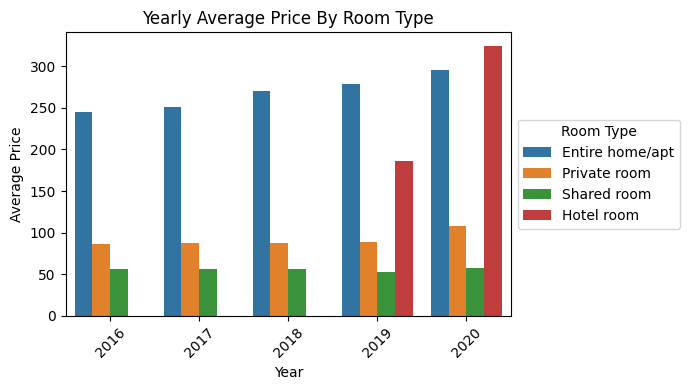

In [ ]:
# Step 0: Remove any formatting from the 'price' column and convert to float (if needed)
# df_d['price'] = df_d['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_d['price'] = df_d['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Drop rows where 'calendar_last_scraped', 'price', or 'room_type' is null
df_d = df_d.dropna(subset=['calendar_last_scraped', 'price', 'room_type'])

# Attempt to convert 'calendar_last_scraped' to datetime, coercing errors to NaT
df_d['calendar_last_scraped'] = pd.to_datetime(df_d['calendar_last_scraped'], errors='coerce')

# Optionally, drop rows where 'calendar_last_scraped' is NaT after conversion attempt
df_d = df_d.dropna(subset=['calendar_last_scraped'])

# Extract the year from 'calendar_last_scraped'
df_d['year'] = df_d['calendar_last_scraped'].dt.year

# Group by 'room_type' and 'year', then calculate the average price
avg_price_per_year = df_d.groupby(['room_type', 'year'])['price'].mean().reset_index()
avg_price_per_year = avg_price_per_year.loc[avg_price_per_year['year'].isin([2016, 2017, 2018, 2019, 2020])]

print(avg_price_per_year)
# Plot the results
plt.figure(figsize=(7, 4))
sns.barplot(data=avg_price_per_year, x='year', y='price', hue='room_type')


plt.title('Yearly Average Price By Room Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Room Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df_venice = df_d.loc[df_d['neighbourhood_cleansed'] == 'Venice']

In [ ]:
# Assuming df_all_results contains the required data

# Find the row with the highest average price per room type and year
highest_avg_price_per_room_year = df_all_results.loc[df_all_results.groupby(['year', 'room_type'])['price'].idxmax()]

# Sort the results for better readability
highest_avg_price_per_room_year = highest_avg_price_per_room_year.sort_values(by=['year', 'room_type', 'price'], ascending=[True, True, False])

# Create a pivot table with years and room types as indexes, neighbourhoods as columns, and average prices as values
pivot_table = df_all_results.pivot_table(index=['year', 'room_type'],
                                         columns='neighbourhood',
                                         values='price',
                                         aggfunc='mean')

# Use the `style.highlight_max` to highlight the maximum values in the pivot table for better visibility
styled_pivot = pivot_table.style.highlight_max(color='lightgreen', axis=1)

# Display the styled pivot table
styled_pivot



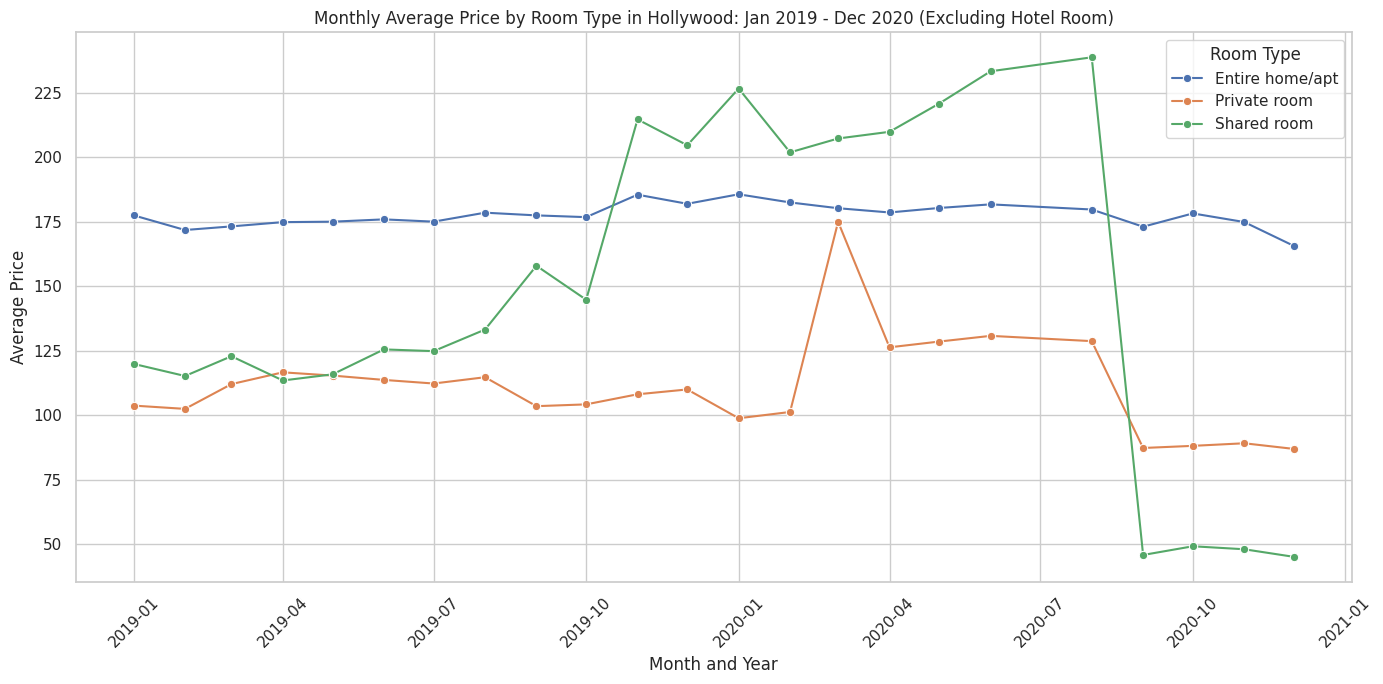

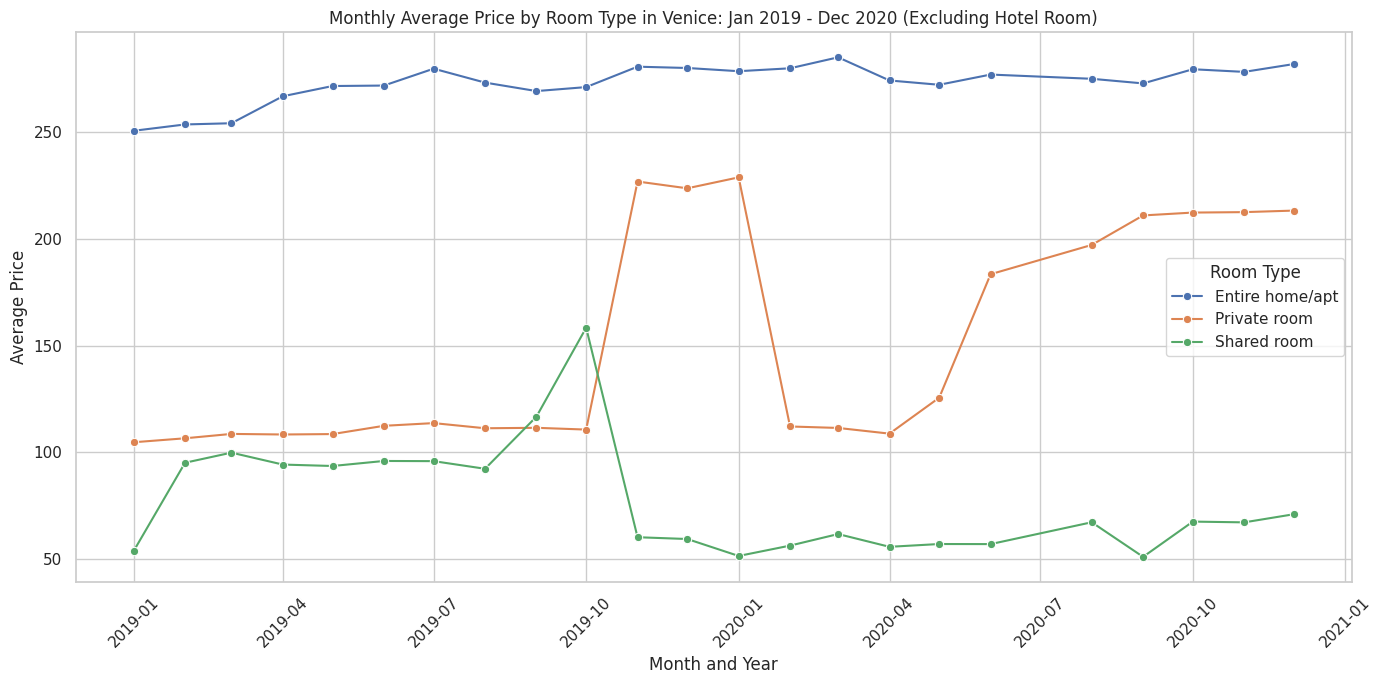

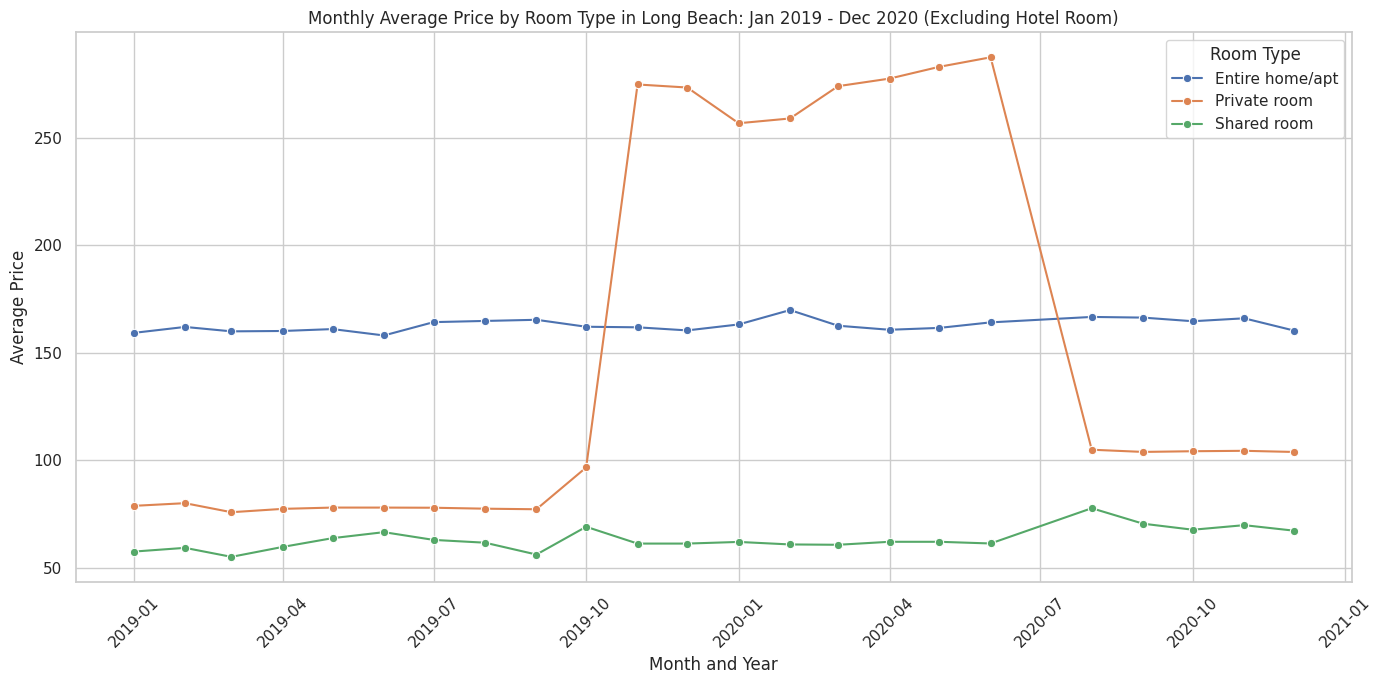

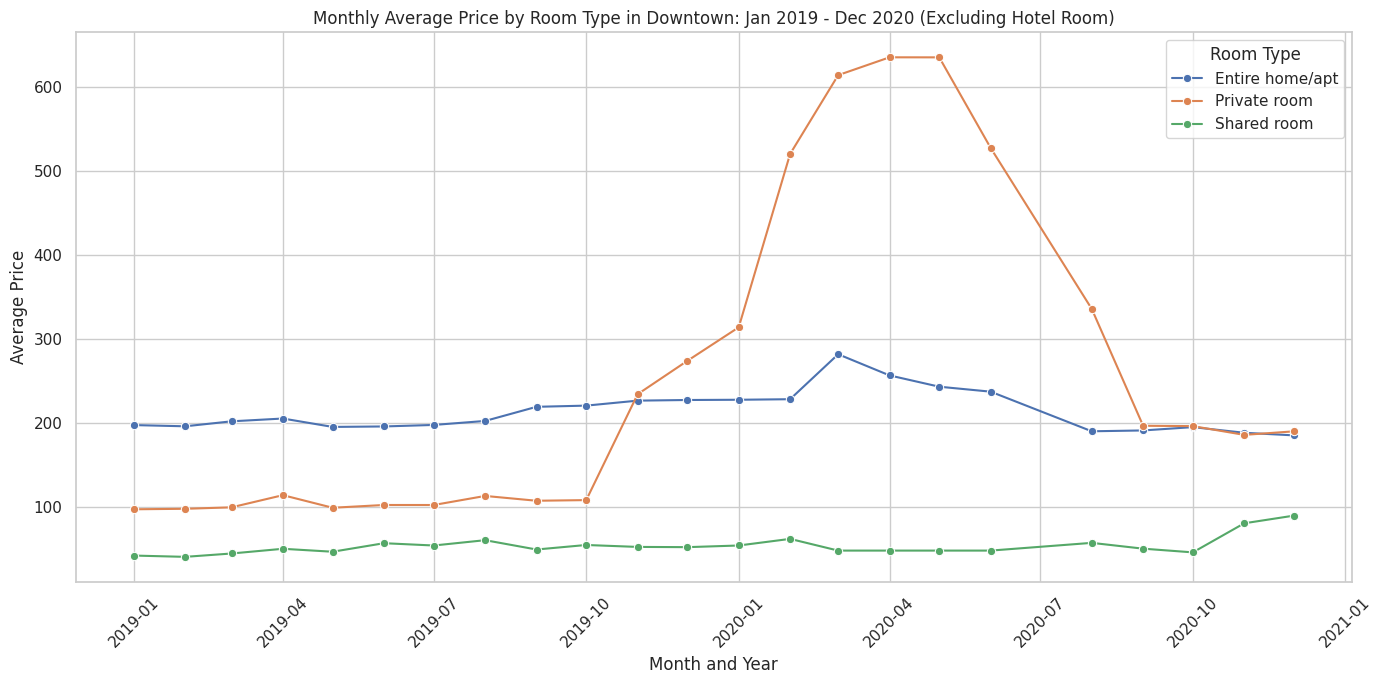

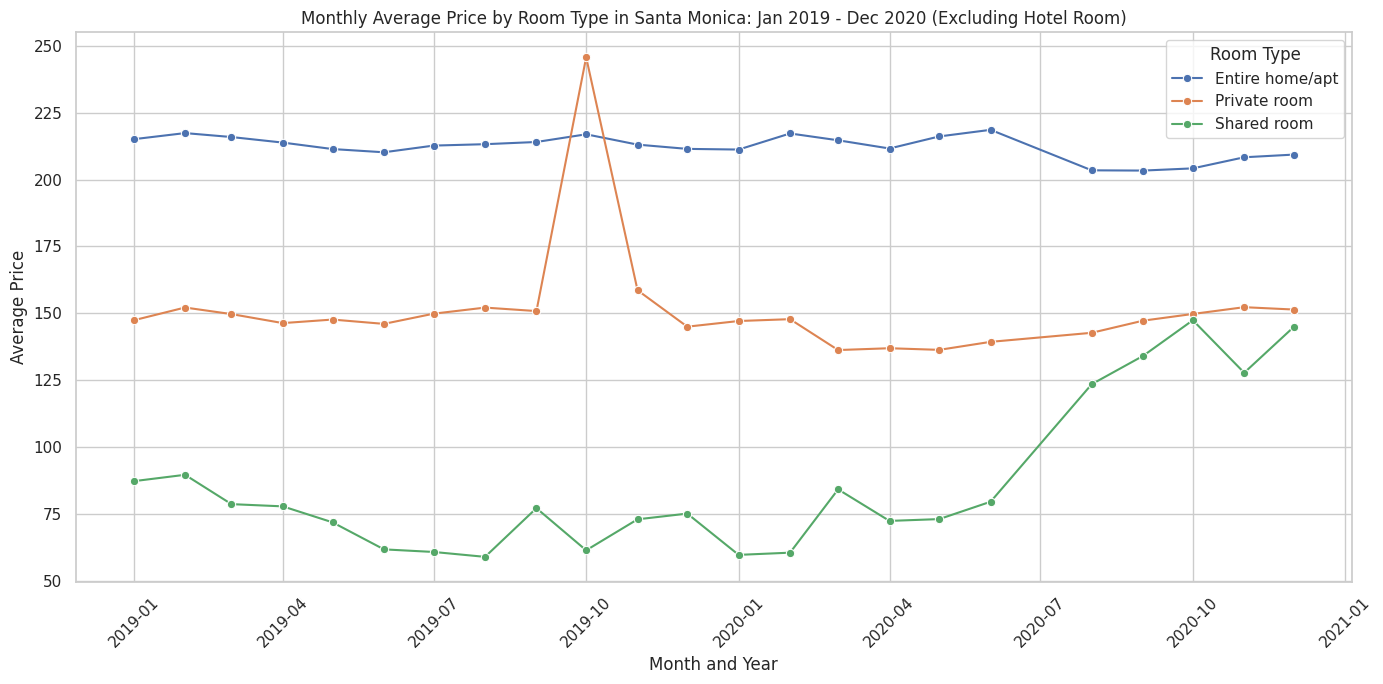

In [ ]:
#Plotting avg monthly price by room type in each neighbourhood
# Step 1: Filter the DataFrame for the date range and exclude 'Hotel room'
df_filtered_date = df_d[(df_d['calendar_last_scraped'] >= '2019-01-01') &
                        (df_d['calendar_last_scraped'] <= '2020-12-31') &
                        (df_d['room_type'] != 'Hotel room')]

# Extract month and year for easier grouping
df_filtered_date['month_year'] = df_filtered_date['calendar_last_scraped'].dt.to_period('M')

# Step 2: Identify the Top 5 Neighbourhoods based on the number of listings
top_neighbourhoods = df_filtered_date['neighbourhood_cleansed'].value_counts().head(5).index.tolist()

# Step 3 & 4: Calculate Monthly Average Price and Plot for Each Neighbourhood
for neighbourhood in top_neighbourhoods:
    df_neighbourhood = df_filtered_date[df_filtered_date['neighbourhood_cleansed'] == neighbourhood]

    # Group by 'month_year' and 'room_type', then calculate the average price
    avg_price_per_month_room = df_neighbourhood.groupby(['month_year', 'room_type'])['price'].mean().reset_index()
    avg_price_per_month_room['month_year'] = avg_price_per_month_room['month_year'].dt.to_timestamp()  # For plotting

    # Plot the results
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=avg_price_per_month_room, x='month_year', y='price', hue='room_type', marker='o')

    plt.title(f'Monthly Average Price by Room Type in {neighbourhood}: Jan 2019 - Dec 2020 (Excluding Hotel Room)')
    plt.xlabel('Month and Year')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()


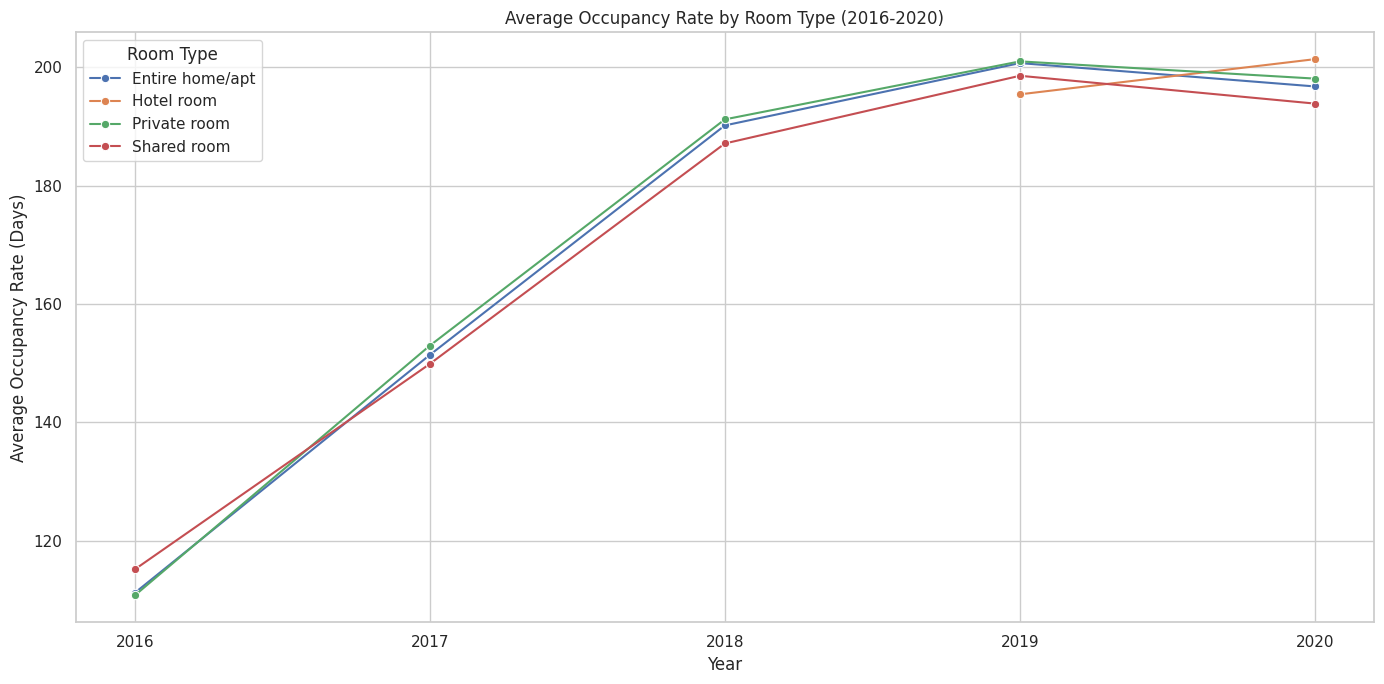

In [ ]:
#Avg yearly occupancy rate by room type
# Ensure your date column is in datetime format and extract the year
df_d['calendar_last_scraped'] = pd.to_datetime(df_d['calendar_last_scraped'])
df_d['year'] = df_d['calendar_last_scraped'].dt.year

# Calculate Occupancy based on availability
# Assuming 'availability_365' is your column for the number of days a listing is available for booking
# Calculate occupancy as the number of days booked
df_d['occupancy'] = 365 - df['availability_365']  # Adjust if your column name differs

# Filter for the years 2016 to 2020
df_filtered_years = df_d[(df_d['year'] >= 2016) & (df_d['year'] <= 2020)]

# Group by Room Type and Year, then calculate average occupancy rate
occupancy_by_room_year = df_filtered_years.groupby(['room_type', 'year'])['occupancy'].mean().reset_index()

# Plot the Results
plt.figure(figsize=(14, 7))
sns.lineplot(data=occupancy_by_room_year, x='year', y='occupancy', hue='room_type', marker='o')

plt.title('Average Occupancy Rate by Room Type (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Average Occupancy Rate (Days)')
plt.xticks(range(2016, 2021))  # Ensure x-axis ticks cover each year from 2016 to 2020
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


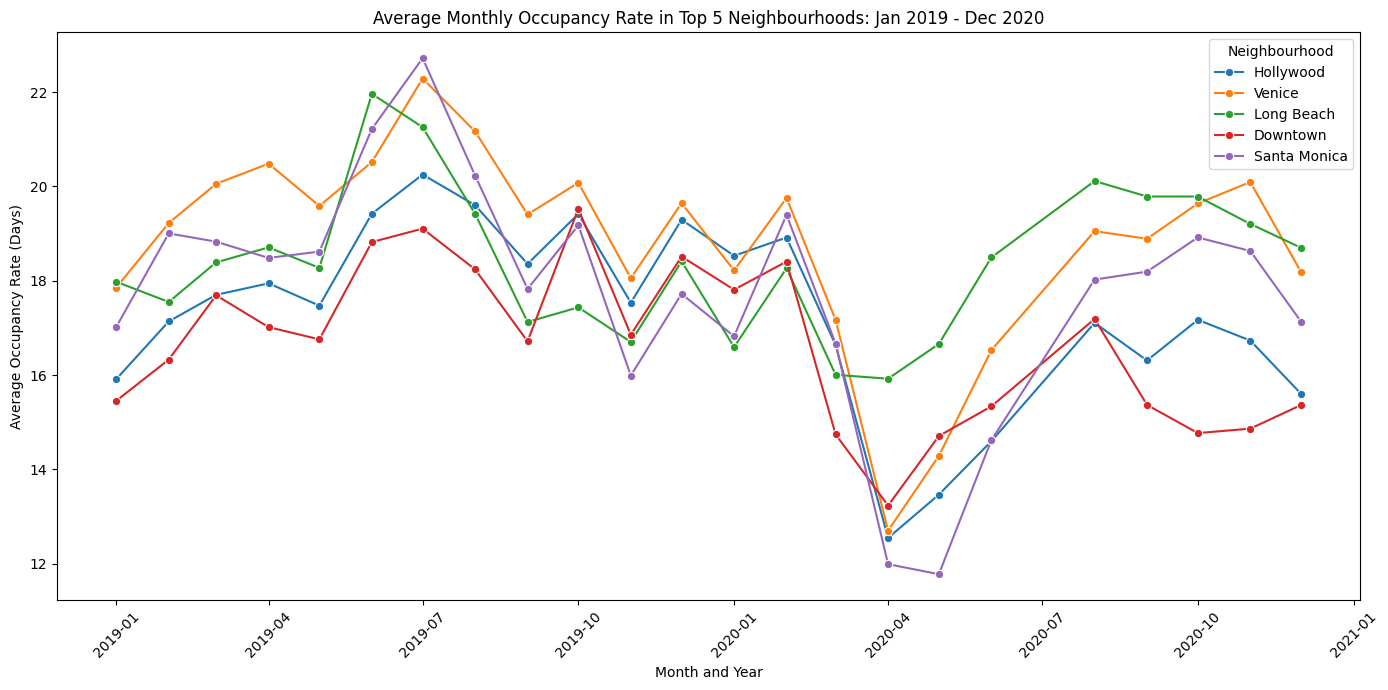

In [ ]:
#Avg monthly occupancy rate by neighbourhood in covid period
# Ensure 'calendar_last_scraped' is in datetime format and extract year and month
df_d['calendar_last_scraped'] = pd.to_datetime(df_d['calendar_last_scraped'])
df_d['year'] = df_d['calendar_last_scraped'].dt.year
df_d['month'] = df_d['calendar_last_scraped'].dt.month
df_d['month_year'] = df_d['calendar_last_scraped'].dt.to_period('M')

# Filter for January 2019 to December 2020
df_filtered_date = df_d[(df_d['calendar_last_scraped'] >= '2019-01-01') &
                        (df_d['calendar_last_scraped'] <= '2020-12-31')]

# Identify Top 5 Neighbourhoods
top_neighbourhoods = df_filtered_date['neighbourhood_cleansed'].value_counts().head(5).index.tolist()

# Step 3: Calculate Monthly Occupancy
df_filtered_date['occupancy'] = 30 - df_filtered_date['availability_30']

# Collecting data for all top neighbourhoods
all_neighbourhoods_data = []

for neighbourhood in top_neighbourhoods:
    df_neighbourhood = df_filtered_date[df_filtered_date['neighbourhood_cleansed'] == neighbourhood]
    avg_occupancy_per_month = df_neighbourhood.groupby(['month_year'])['occupancy'].mean().reset_index()
    avg_occupancy_per_month['neighbourhood'] = neighbourhood  # Add neighbourhood for identification
    all_neighbourhoods_data.append(avg_occupancy_per_month)

# Combine into a single DataFrame
all_neighbourhoods_occupancy = pd.concat(all_neighbourhoods_data)

# Convert 'month_year' from Period to datetime for plotting
all_neighbourhoods_occupancy['month_year'] = all_neighbourhoods_occupancy['month_year'].dt.to_timestamp()

# Step 4: Aggregate and Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=all_neighbourhoods_occupancy, x='month_year', y='occupancy', hue='neighbourhood', marker='o')

plt.title('Average Monthly Occupancy Rate in Top 5 Neighbourhoods: Jan 2019 - Dec 2020')
plt.xlabel('Month and Year')
plt.ylabel('Average Occupancy Rate (Days)')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood')
plt.tight_layout()
plt.show()


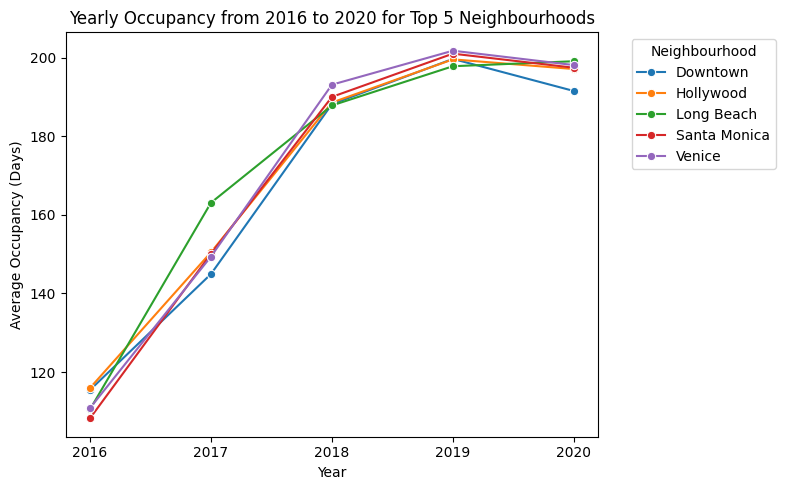

In [ ]:
#Yearly occupancy by neighbourhood

# Step 1: Convert 'calendar_last_scraped' to datetime format and extract the year
df_d['calendar_last_scraped'] = pd.to_datetime(df_d['calendar_last_scraped'])
df_d['year'] = df_d['calendar_last_scraped'].dt.year

# Calculate Occupancy
df_d['occupancy'] = 365 - df['availability_365']

# Filter data for 2016 to 2020
df_filtered = df_d[df_d['year'].between(2016, 2020)]

# Step 2: Determine the Top 5 Neighbourhoods
top_neighbourhoods = df_filtered['neighbourhood_cleansed'].value_counts().nlargest(5).index

# Step 3: Aggregate Yearly Average Occupancy
df_grouped = df_filtered[df_filtered['neighbourhood_cleansed'].isin(top_neighbourhoods)]
avg_occupancy_yearly = df_grouped.groupby(['neighbourhood_cleansed', 'year'])['occupancy'].mean().reset_index()

# Step 4: Plot the Trends
plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_occupancy_yearly, x='year', y='occupancy', hue='neighbourhood_cleansed', marker='o', palette='tab10')

plt.title('Yearly Occupancy from 2016 to 2020 for Top 5 Neighbourhoods')
plt.xlabel('Year')
plt.ylabel('Average Occupancy (Days)')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2016, 2021))  # Ensure x-axis covers each year from 2016 to 2020

plt.tight_layout()
plt.show()


Change in volume of listings from 2019 to 2020: -135985


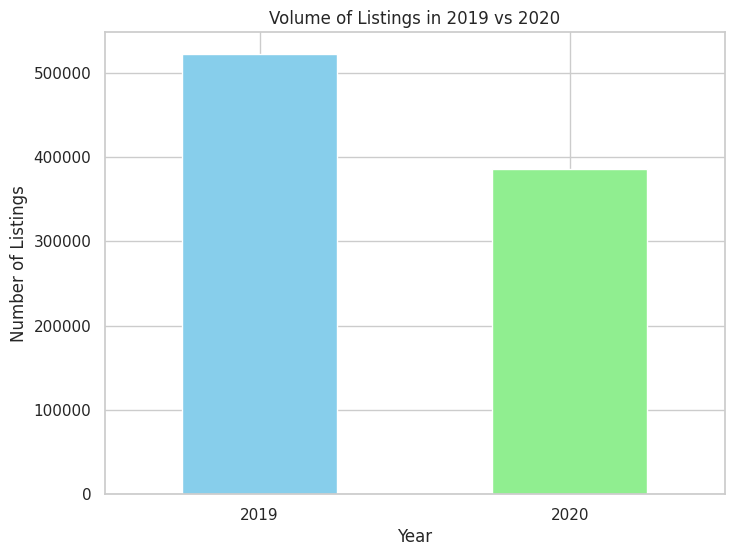

In [ ]:
#Covid period volume of listings comparison

# Step 1: Convert 'calendar_last_scraped' to datetime format
df_d['calendar_last_scraped'] = pd.to_datetime(df_d['calendar_last_scraped'])

# Step 2: Extract the year
df_d['year'] = df_d['calendar_last_scraped'].dt.year

# Step 3: Filter listings for 2019 and 2020
df_filtered_years = df_d[df_d['year'].isin([2019, 2020])]

# Step 4: Count listings per year
listings_per_year = df_filtered_years['year'].value_counts().sort_index()

# Step 5: Calculate the change in volume from 2019 to 2020
change_in_volume = listings_per_year[2020] - listings_per_year[2019]

print(f"Change in volume of listings from 2019 to 2020: {change_in_volume}")



# Set the style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 6))
listings_per_year.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Volume of Listings in 2019 vs 2020')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)

plt.show()


In [ ]:
# Step 1: Convert 'calendar_last_scraped' to datetime format and extract the year
df_d['calendar_last_scraped'] = pd.to_datetime(df_d['calendar_last_scraped'])
df_d['year'] = df_d['calendar_last_scraped'].dt.year

# Step 2: Filter for 2019 and 2020
df_filtered_years = df_d[df_d['year'].isin([2019, 2020])]

# Step 3: Group data by neighbourhood and year, then count listings
listings_by_neighbourhood_year = df_filtered_years.groupby(['neighbourhood_cleansed', 'year']).size().unstack()

# Step 4: Calculate the change in volume from 2019 to 2020
listings_by_neighbourhood_year['change_in_volume'] = listings_by_neighbourhood_year[2020] - listings_by_neighbourhood_year[2019]

# Step 5: Identify neighbourhoods with the most significant changes in volume of listings during covid
# Sort the neighbourhoods by the magnitude of change to find the top ones
most_changed_neighbourhoods = listings_by_neighbourhood_year.sort_values(by='change_in_volume', key=abs, ascending=False)

# Display the top 5 neighbourhoods with the most change
print(most_changed_neighbourhoods[['change_in_volume']].head(5))


year                    change_in_volume
neighbourhood_cleansed                  
Hollywood                       -12391.0
Venice                          -11409.0
Downtown                         -6470.0
Westlake                         -5117.0
Koreatown                        -4372.0
